# Part II - Ford GoBike System Data Explanatory Analysis
## by Kayode Dada

## Investigation Overview
In this investigation I want to explore how age and gender influence the length of bike-share trips and understanding usage differences between subscribers and occasional customers. Below is a summary of the finding from the exploratory stage

**Summary of Findings:**
- A concentration of users in the younger age range (20-40 years), with a right-skewed age distribution that declines with age.
- Trip durations were generally short across all ages, with most trips below 200 minutes.
- User type (Customer vs. Subscriber) was more influential on trip duration patterns than gender, with Subscribers showing more consistent trip durations and Customers (occasional users) showing more variability.
- Gender patterns were similar across categories, though Male users had the highest trip frequency.
- Outliers, such as improbable ages over 100 and trip durations exceeding 600 minutes, indicated data quality issues.

#### Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
The dataset contains 183,412 entries with 16 columns. Each ride is represented by a single row in the dataset. The dataset contains information on bike-share trips and details of each trip's duration, start and end times, and station locations (start and end stations). It also includes user demographics, such as birth year, gender, and user type.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
ford_gobike_data = pd.read_csv('./data/201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

#### Cleaning Dataset For Explanatory Analysis

In [7]:
## Make a copy of the dataset before cleaning and explanatory analysis
ford_gobike_cleaned = ford_gobike_data.copy()

In [8]:
## Filter the dataset to remove variables not needed for analysis
filtered_columns = ['duration_sec', 'member_birth_year', 'user_type', 'member_gender']
ford_gobike_cleaned = ford_gobike_cleaned[filtered_columns]

In [9]:
## Convert Birth Year to Age
current_year = 2019
ford_gobike_cleaned['member_age'] = current_year - ford_gobike_cleaned['member_birth_year']

# Convert Duration to Minutes for better readability
ford_gobike_cleaned['duration_minute'] = ford_gobike_cleaned['duration_sec']/60

## Remove Outliers from dataset 
age_min, age_max = 18, 75 # Set age range, above 75 seems unlikely or improbable and don't want to bias for younger rider
duration_max_minute = 240 # 4 hours in minutes, most rides in the exploration were around 200 minutes

# Filter the dataset to remove rows with unrealistic ages and extremely long durations
ford_gobike_cleaned = ford_gobike_cleaned[(ford_gobike_cleaned['member_age'] >= age_min)
                                        & (ford_gobike_cleaned['member_age'] <= age_max)
                                        & (ford_gobike_cleaned['duration_minute'] <= duration_max_minute)]

## Impact of Age on Trip Duration - Scatter Plot
The scatter plot allows for the visualization of any relationship between member age and trip duration. Removing outliers and applying the log transformation the data is less skewed, and patterns in trip duration across member age become clearer.

In this dataset, age has a negligible impact on trip duration. Most age groups appear to use the service in similar ways, with trip lengths remaining steady across the demographic spectrum.

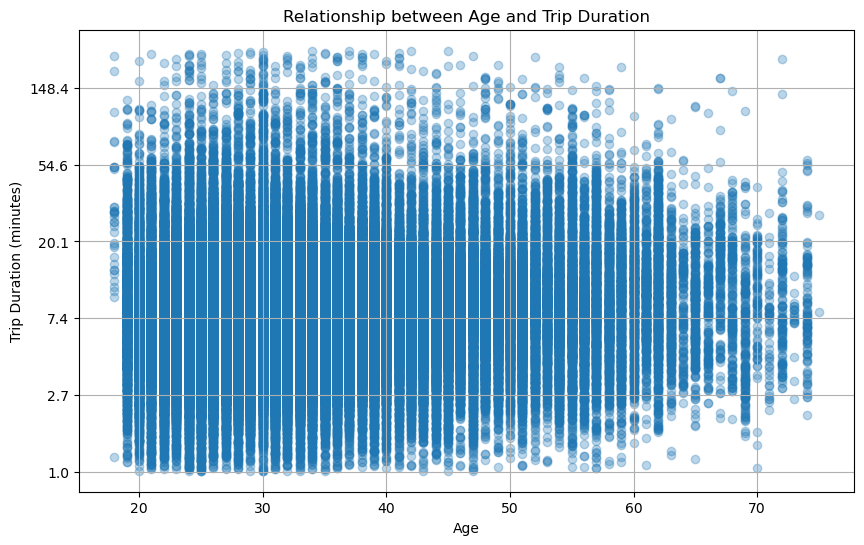

In [11]:
# Creating a scatter plot with log transformation of duration minutes to show the distribution of trip durations by age
ford_gobike_cleaned['log_duration_minute'] = np.log(ford_gobike_cleaned['duration_minute'])

plt.figure(figsize=(10, 6))
plt.scatter(ford_gobike_cleaned['member_age'], ford_gobike_cleaned['log_duration_minute'], alpha=0.3)
plt.title('Relationship between Age and Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration (minutes)')
y_ticks = plt.gca().get_yticks()  # Get current y-ticks on the log scale
plt.gca().set_yticklabels([f"{np.exp(y):.1f}" for y in y_ticks])  # Convert from log back to minutes
plt.grid(True)
plt.show();

## Impact of Gender on Trip Duration - Box Plot

This box plot visualizes the distribution of trip durations by gender (in minutes), highlighting typical trip times and variations for each gender group. The median trip durations are fairly close, with Female at 9.45 minutes, Male at 8.22 minutes, and Other at 9.22 minutes. The interquartile ranges (IQRs) are also similar, showing consistent spread in trip duration across genders. Average trip durations show slight differences, with Female averaging 12.47 minutes, Male at 10.81 minutes, and Other at 14.17 minutes. These small variations suggest gender has minimal impact on trip duration patterns, as the majority of trips fall within comparable ranges across all genders. Overall, the plot indicates similar trip length usage among all gender groups

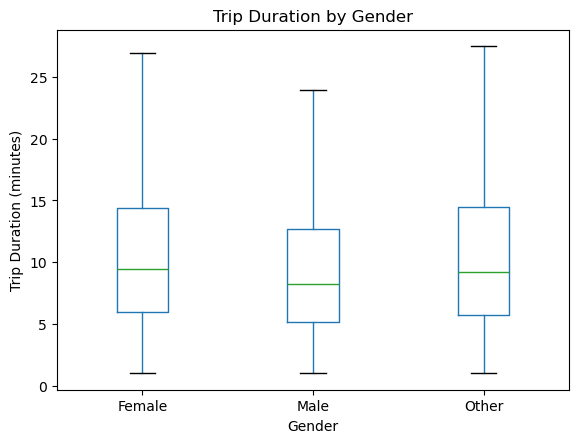

In [13]:
# Creating the Box Plot to show the distribution of trip durations by gender
ford_gobike_cleaned.boxplot(column='duration_minute', by='member_gender', grid=False, showfliers=False)
plt.title('Trip Duration by Gender')
plt.suptitle('')  # Remove automatic title
plt.xlabel('Gender')
plt.ylabel('Trip Duration (minutes)')
plt.show();

## Impact of User Type on Trip Duration/Frequency - Bar Plots
The bar plots provide insights into how user type impacts both trip duration and frequency. The average trip duration plot shows that customers typically have longer trips. In contrast, subscribers have shorter trips. This pattern suggests that user type plays a role in the average duration of trips, with customers spending more time per trip.

The trip frequency plot highlights that subscribers take trips more frequently than customers, reflecting their higher engagement with the service. This high frequency aligns with subscribers' potential needs versus casual users who appear to engage less frequently.

In summary, user type significantly influences both trip duration and trip frequency. Customers favor longer but less frequent trips, whereas subscribers tend toward shorter, more frequent trips, indicating regular use. Together, these insights suggest that subscribers are the primary user base and that user type defines patterns of platform usage.

In [15]:
## create and show barplot
def show_barplot( df, title, xlabel, ylabel):
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.show() 


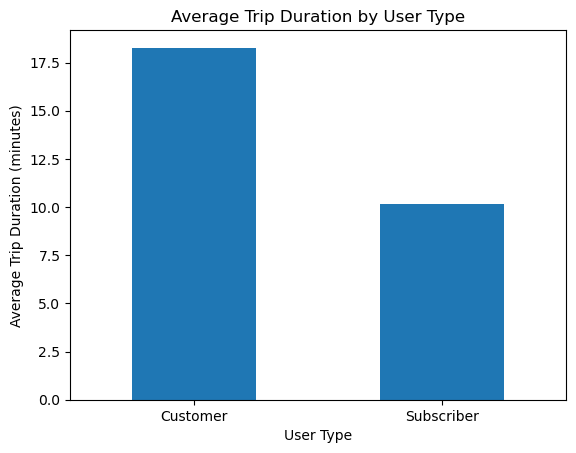

In [16]:
# Creating a Bar Plot to show the average trip duration by user type
ford_gobike_user_mean_duration = ford_gobike_cleaned.groupby('user_type')['duration_minute'].mean()
show_barplot(ford_gobike_user_mean_duration, 'Average Trip Duration by User Type', 'User Type', 'Average Trip Duration (minutes)')


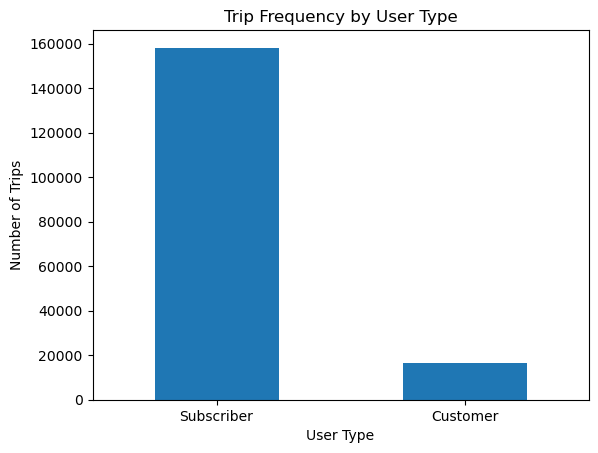

In [17]:
# Creating a bar plot to show the frequency of trips by user type
ford_gobike_usage_freq = ford_gobike_cleaned['user_type'].value_counts()
show_barplot(ford_gobike_usage_freq, 'Trip Frequency by User Type',
            'User Type', 'Number of Trips')